<a href="https://colab.research.google.com/github/nelsonbeas33/AprendizajeAutomaticoFCFM/blob/main/tarea5/tarea_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from google.colab import drive
from tabulate import tabulate
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
drive.mount('/AA_FCFM/')

Mounted at /AA_FCFM/


In [13]:
data = pd.read_csv("/AA_FCFM/MyDrive/AA_FCFM/Cancer_Data.csv")
data = data.drop(columns=['Unnamed: 32'])
data['diagnosis'] = data['diagnosis'].replace({'M': 1, 'B': 0})
print(data)

           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1

In [14]:
subset_columns = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean']
data = data[subset_columns]
print(data)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  
0            0.11840           0.27760         0.30010   

In [17]:
descriptive_stats_all = data.describe(include='all')
print(tabulate(descriptive_stats_all, headers='keys', tablefmt='fancy_grid'))

╒═══════╤═════════════╤═══════════════╤════════════════╤══════════════════╤═════════════╤═══════════════════╤════════════════════╤══════════════════╤═══════════════════════╕
│       │   diagnosis │   radius_mean │   texture_mean │   perimeter_mean │   area_mean │   smoothness_mean │   compactness_mean │   concavity_mean │   concave points_mean │
╞═══════╪═════════════╪═══════════════╪════════════════╪══════════════════╪═════════════╪═══════════════════╪════════════════════╪══════════════════╪═══════════════════════╡
│ count │  569        │     569       │      569       │          569     │     569     │       569         │        569         │      569         │           569         │
├───────┼─────────────┼───────────────┼────────────────┼──────────────────┼─────────────┼───────────────────┼────────────────────┼──────────────────┼───────────────────────┤
│ mean  │    0.372583 │      14.1273  │       19.2896  │           91.969 │     654.889 │         0.0963603 │          0.104341  │

In [27]:
datos_sinEtiqueta = X = data.drop('diagnosis', axis=1)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(datos_sinEtiqueta)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
count_mismatch = (data['diagnosis'] != data['cluster']).sum()
print("Número de elementos con diagnosis y cluster diferentes:", count_mismatch)


Número de elementos con diagnosis y cluster diferentes: 92


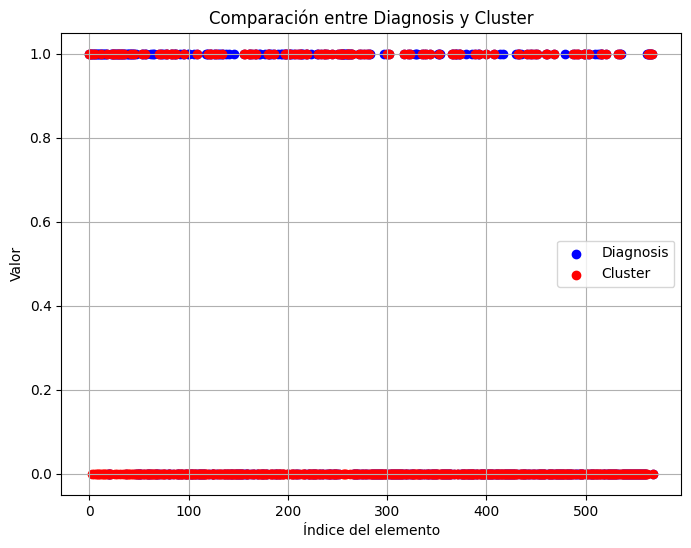

In [34]:
plt.figure(figsize=(8, 6))

# Graficar diagnosis
plt.scatter(range(len(data)), data['diagnosis'], color='blue', label='Diagnosis')

# Graficar cluster
plt.scatter(range(len(data)), data['cluster'], color='red', label='Cluster')

plt.xlabel('Índice del elemento')
plt.ylabel('Valor')
plt.title('Comparación entre Diagnosis y Cluster')
plt.legend()
plt.grid(True)
plt.show()

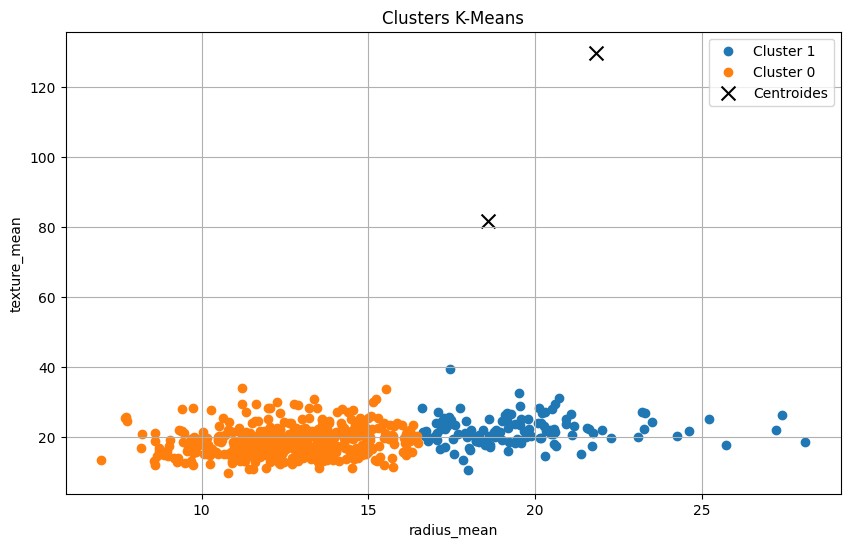

In [35]:
feature1 = 'radius_mean'
feature2 = 'texture_mean'

plt.figure(figsize=(10, 6))

# Dibuja los puntos de datos agrupados por cluster
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

# Dibuja los centroides de los clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, data.columns.get_loc(feature1)], centroids[:, data.columns.get_loc(feature2)], marker='x', color='black', s=100, label='Centroides')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Clusters K-Means')
plt.legend()
plt.grid(True)
plt.show()

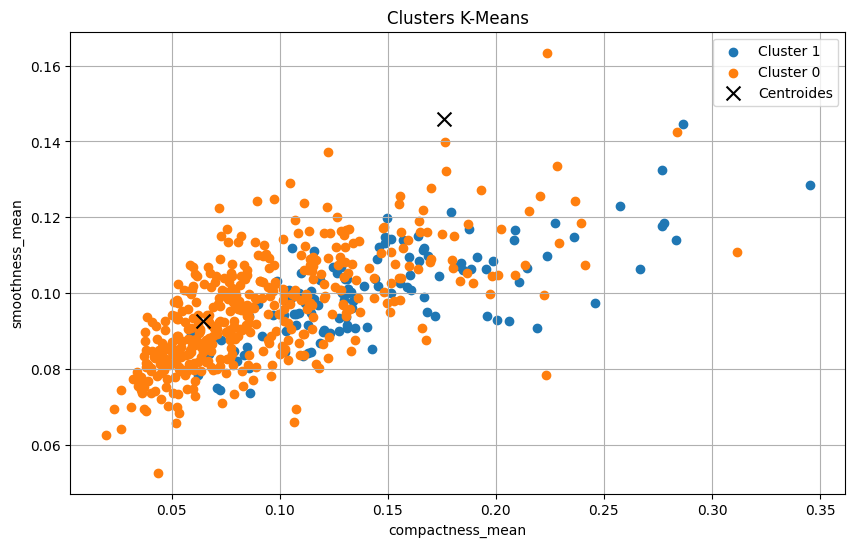

In [36]:
feature1 = 'compactness_mean'
feature2 = 'smoothness_mean'

plt.figure(figsize=(10, 6))

# Dibuja los puntos de datos agrupados por cluster
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

# Dibuja los centroides de los clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, data.columns.get_loc(feature1)], centroids[:, data.columns.get_loc(feature2)], marker='x', color='black', s=100, label='Centroides')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Clusters K-Means')
plt.legend()
plt.grid(True)
plt.show()

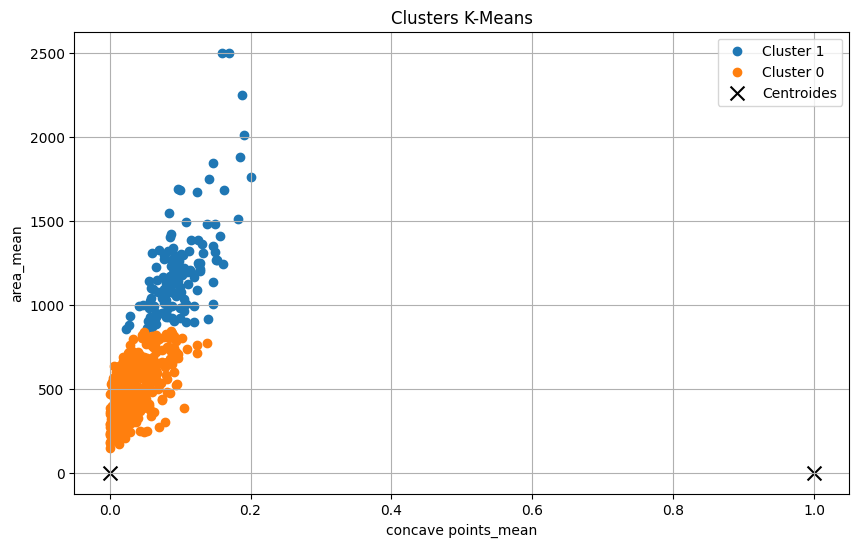

In [38]:
feature1 = 'concave points_mean'
feature2 = 'area_mean'

plt.figure(figsize=(10, 6))

# Dibuja los puntos de datos agrupados por cluster
for cluster in data['cluster'].unique():
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'Cluster {cluster}')

# Dibuja los centroides de los clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, data.columns.get_loc(feature1)], centroids[:, data.columns.get_loc(feature2)], marker='x', color='black', s=100, label='Centroides')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Clusters K-Means')
plt.legend()
plt.grid(True)
plt.show()

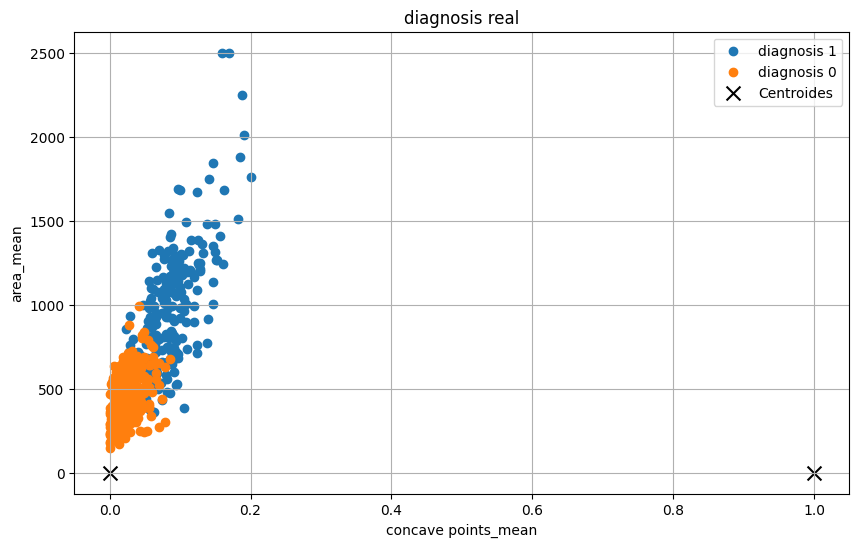

In [39]:
feature1 = 'concave points_mean'
feature2 = 'area_mean'

plt.figure(figsize=(10, 6))

# Dibuja los puntos de datos agrupados por cluster
for cluster in data['diagnosis'].unique():
    cluster_data = data[data['diagnosis'] == cluster]
    plt.scatter(cluster_data[feature1], cluster_data[feature2], label=f'diagnosis {cluster}')

# Dibuja los centroides de los clusters
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, data.columns.get_loc(feature1)], centroids[:, data.columns.get_loc(feature2)], marker='x', color='black', s=100, label='Centroides')

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('diagnosis real')
plt.legend()
plt.grid(True)
plt.show()